# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [17]:
df = pd.read_csv('adult_clustering.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Cluster_Label
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
4,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,2


In [18]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country']
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 
                    'capital-loss', 'hours-per-week']

In [19]:
# Scaling dan Encoding Data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

df_transformed = preprocessor.fit_transform(df)

In [20]:
# Dapatkan nama fitur setelah encoding
encoded_features = numeric_features.copy()
for i, feature in enumerate(categorical_features):
    categories = preprocessor.named_transformers_['cat'].categories_[i][1:]
    encoded_features.extend([f"{feature}_{cat}" for cat in categories])
df_new = pd.DataFrame(df_transformed, columns=encoded_features)
df_new['Cluster_Label'] = df['Cluster_Label']
df_new.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,Cluster_Label
0,0.052632,0.345616,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.842105,0.514823,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.473684,1.434597,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000000,0.957120,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.789474,0.292357,-0.333333,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [21]:
X = df_new.drop('Cluster_Label', axis=1)  # Fitur
y = df_new['Cluster_Label']               # Target (label cluster)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [23]:
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

In [24]:
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

- Random Forest: Algoritma ini menggunakan kumpulan pohon keputusan untuk membuat prediksi yang stabil dan akurat.
- Logistic Regression: Algoritma regresi logistik ini bekerja baik dalam kasus klasifikasi biner atau multi-kelas sederhana.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [25]:
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

In [26]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

In [27]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_lr = confusion_matrix(y_test, y_pred_lr)

In [28]:
print("Random Forest - Accuracy:", rf_accuracy, "F1-Score:", rf_f1)
print("Logistic Regression - Accuracy:", lr_accuracy, "F1-Score:", lr_f1)

Random Forest - Accuracy: 0.9975490196078431 F1-Score: 0.9975397641792285
Logistic Regression - Accuracy: 0.9992997198879552 F1-Score: 0.9992993096620638


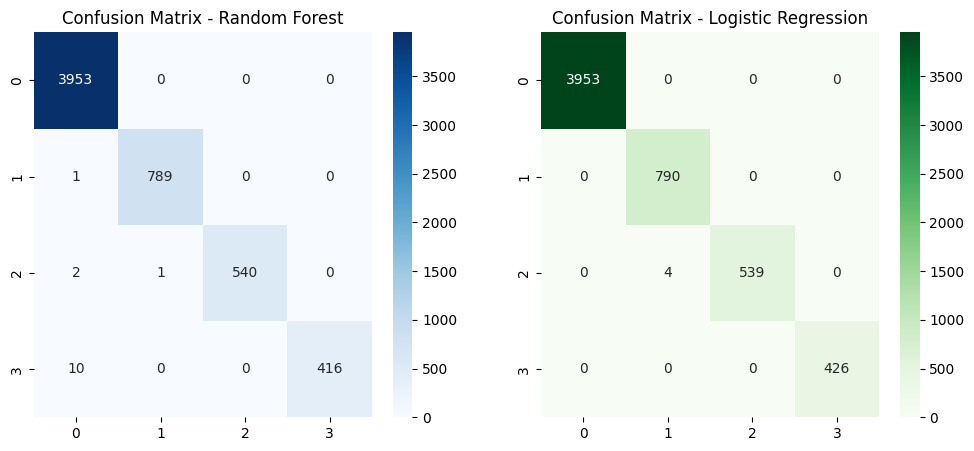

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Random Forest')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Confusion Matrix - Logistic Regression')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [30]:
# Gunakan GridSearchCV untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [31]:
best_rf_model = grid_search.best_estimator_

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [32]:
y_pred_best_rf = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
best_rf_f1 = f1_score(y_test, y_pred_best_rf, average='weighted')

print("Random Forest After Tuning - Accuracy:", best_rf_accuracy, "F1-Score:", best_rf_f1)

Random Forest After Tuning - Accuracy: 0.9989495798319328 F1-Score: 0.9989472474676312


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [33]:
print("Before Tuning - Accuracy:", rf_accuracy, "F1-Score:", rf_f1)
print("After Tuning - Accuracy:", best_rf_accuracy, "F1-Score:", best_rf_f1)

Before Tuning - Accuracy: 0.9975490196078431 F1-Score: 0.9975397641792285
After Tuning - Accuracy: 0.9989495798319328 F1-Score: 0.9989472474676312


Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

1. Random Forest:
- Accuracy sebelum tuning: 99.75% dan F1-Score: 0.9975.
- Accuracy setelah tuning: 99.89% dan F1-Score: 0.9989.
- Setelah dilakukan tuning, model Random Forest mengalami peningkatan akurasi dan F1-Score. Hal ini menunjukkan bahwa pemilihan hyperparameter yang optimal dapat meningkatkan performa.
2. Logistic Regression:
- Memiliki akurasi yang sangat tinggi, yaitu 99.93%, dan F1-Score yang juga sangat baik, yaitu 0.9993.
- Logistic Regression bekerja dengan sangat baik pada dataset ini dan menunjukkan performa yang lebih baik dibandingkan Random Forest setelah tuning.
3. Confusion Matrix Analisis
- Logistic Regression dan Random Forest keduanya mampu mengklasifikasikan kelas dengan akurasi yang sangat baik. Hanya terdapat beberapa kesalahan prediksi di kelas 1, 2, dan 3.
- Logistic Regression terlihat sedikit lebih baik dalam menangani kelas minor, seperti yang ditunjukkan oleh kesalahan yang lebih sedikit di matriks konfusi.
4. Rekomendasi
- Random Forest dengan tuning hyperparameter menghasilkan peningkatan yang signifikan, namun jika tujuan utamanya adalah akurasi, maka Logistic Regression tampak memberikan hasil terbaik di dataset ini.
- Jika model mengalami overfitting atau underfitting, disarankan untuk menambah data atau mencoba algoritma lain seperti SVM atau boosting (e.g., XGBoost).